In [31]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
# Define your model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

d:\Program Files\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
# Compile your model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
# Preprocess your dataset
train_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

Found 62 images belonging to 2 classes.


In [35]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('dataset/validation',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

X_test, y_test = next(test_set)

Found 10 images belonging to 2 classes.


In [36]:
# Train your model
model.fit(training_set, epochs=25, validation_data=test_set)

Epoch 1/25


d:\Program Files\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 507ms/step - accuracy: 0.5111 - loss: 4.0352 - val_accuracy: 0.5000 - val_loss: 1.0235
Epoch 2/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - accuracy: 0.5212 - loss: 1.6185 - val_accuracy: 0.5000 - val_loss: 3.1046
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.4670 - loss: 2.8385 - val_accuracy: 0.5000 - val_loss: 2.0060
Epoch 4/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - accuracy: 0.5004 - loss: 1.5089 - val_accuracy: 0.5000 - val_loss: 0.8015
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - accuracy: 0.5215 - loss: 0.7110 - val_accuracy: 0.5000 - val_loss: 0.8042
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - accuracy: 0.4885 - loss: 0.8997 - val_accuracy: 0.5000 - val_loss: 0.9693
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - accuracy: 0.5316 - loss: 0.9804 - val_accuracy: 0.5000 - val_loss: 0.8820
Epoch 8/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - accuracy: 0.4552 - loss: 0.9778 - val_accuracy: 0.5000 - val_loss: 0.7135
Epo

In [37]:
# Save the model
model.save('VGG16_custom_model.h5')

In [38]:
model = load_model('VGG16_custom_model.h5')

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

Test loss: 0.478
Test accuracy: 0.8


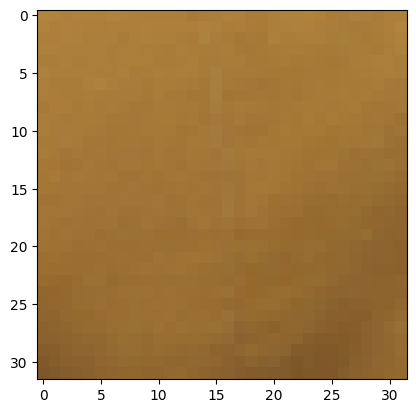

In [39]:
import tensorflow as tf
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = Image.open('File Coba ESP32\\24.jpg')

# Resize and preprocess the image
input_size = (32, 32)  # Replace with the input size your model expects
image = image.resize(input_size)
plt.imshow(image)

# # Predict the class of the image
# prediction = model.predict(image)

# # Display the image and prediction
# plt.imshow(np.squeeze(image))
# plt.title(f'Predicted class: {np.argmax(prediction)}')
# plt.show()

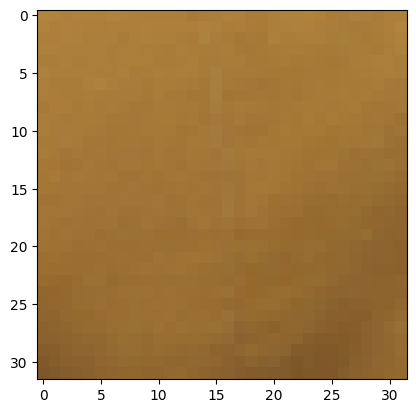

In [40]:
image = np.array(image) / 255.0  # Normalize pixel values if your model expects it
plt.imshow(image)

TypeError: Invalid shape (1, 32, 32, 3) for image data

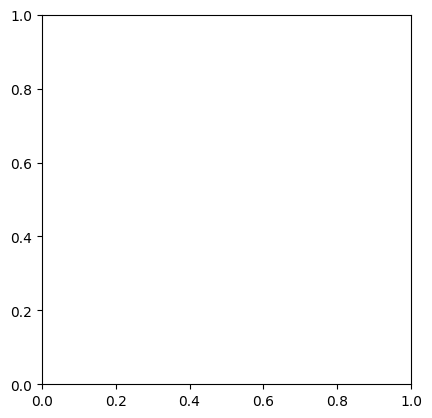

In [41]:
image = np.expand_dims(image, axis=0)  # Add batch dimension
plt.imshow(image)